----
<h1><font color="#f37626">[Experiment]</font> Tensorflow-Classification 예제</h1>

- 보다 상세한 Accuinsight 파이썬 패키지 사용법은 [Accuinsight 안내 홈페이지](https://accuinsight.cloudz.co.kr/#/intro) 또는 [Accuinsight Youtube 채널](https://www.youtube.com/channel/UChFs-FAVxgG4C00h8C1MqoA)을 참조하시기 바랍니다.
- Accuinsight 패키지를 사용한 분석 코드는 [Accuinsight-github](https://github.com/AccuInsight/accuinsight_Lifecycle_example)에서 조회 가능합니다.

### # fashion Mnist
> reference: https://www.tensorflow.org/tutorials/keras/classification
----

### 1. Import packages

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

from Accuinsight.Lifecycle.tensorflow import accuinsight
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt

2021-12-02 15:25:25.824564: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
accu = accuinsight()

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

### 2. Load Fashion-MNIST dataset
__Fashion-Mnist dataset__
- 70,000개의 흑백 이미지로 구성
- 10개의 카테고리로 분류해야 함
(T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)
   

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=10000, random_state=42)

In [4]:
print('Shape of train images: ', train_images.shape)
print('Shape of train labels: ', train_labels.shape)
print('-'*40)
print('Shape of valid images: ', valid_images.shape)
print('Shape of valid labels: ', valid_labels.shape)
print('-'*40)
print('Shape of test images: ', test_images.shape)
print('Shape of test labels: ', test_labels.shape)
print('-'*40)
print('Unique labels:', np.unique(train_labels))

Shape of train images:  (50000, 28, 28)
Shape of train labels:  (50000,)
----------------------------------------
Shape of valid images:  (10000, 28, 28)
Shape of valid labels:  (10000,)
----------------------------------------
Shape of test images:  (10000, 28, 28)
Shape of test labels:  (10000,)
----------------------------------------
Unique labels: [0 1 2 3 4 5 6 7 8 9]


- `train_images` & `train_labels`:  모델 __학습__에 사용되는 훈련 세트입니다.
- `test_images` & `test_labels`: 모델 __테스트__에 사용되는 테스트 세트입니다.

레이블이 정수 배열이므로 원 클래스를 맵핑해주기 위하여 `labels_names` 변수를 다음과 같이 생성해줍니다.

In [5]:
labels_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 3. Data Preprocessing

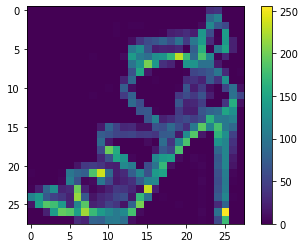

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다.  
신경망 모델에 주입하기 전에 이 값의 범위를 [0, 1]로 조정합니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다.

In [7]:
train_images = train_images / 255.0
valid_images = valid_images / 255.0
test_images = test_images / 255.0

훈련 데이터셋에서 처음 25개 image와 label을 출력해서 데이터 포맷을 확인합니다.

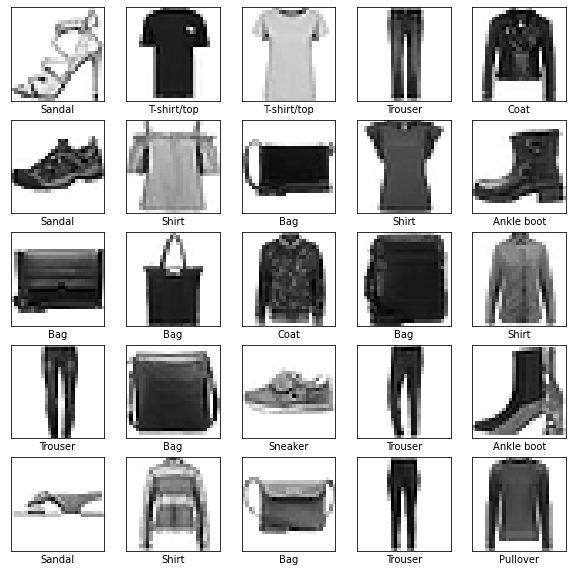

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels_names[train_labels[i]])
plt.show()

### 4. Build model

In [9]:
# keras seqential model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2021-12-02 15:25:35.437893: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-12-02 15:25:35.437929: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: UNKNOWN ERROR (-1)
2021-12-02 15:25:35.437968: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ws-343-7ffd47d6f9-jv86q): /proc/driver/nvidia/version does not exist
2021-12-02 15:25:35.438208: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-02 15:25:35.445041: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2499995000 Hz
2021-12-02 15:25:35.445529: I tensorflow/compiler/xla/se

> __autoDL에서 최적화할 Hyperparameter 지정__

In [10]:
num_nodes = 128
learning_rate = 0.001
batch_size = 256

모델 컴파일 단계에서 다음의 설정이 필요합니다.
- 손실 함수(Loss function): 훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
- 옵티마이저(Optimizer): 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
- 지표(Metrics): 훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [11]:
Adam = keras.optimizers.Adam(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])

### 5. Run model with experiment
- `autolog()`에 현재 학습할 모델에 관한 간단한 tag를 입력할 수 있습니다.
- `autolog()`는 반드시 모델 학습(model.fit()) __이전에__ 호출이 되어야 합니다.

> __모델 학습이 완료되면 `autolog()`는 자동으로 해제됩니다.__  
따라서 모델 학습 이력을 추가하고자 할 경우, 다시 한 번 `autolog()` 호출 후 모델 훈련을 진행해야 합니다.

__(주의) image 데이터의 경우, model_monitor는 사용할 수 없습니다.__(default: `model_monitor = False`)

#### [optional] 1-(1) 메시지 설정 

message를 푸시하는 방법은 2가지 입니다.
1. 모델 학습 완료시 메시지 푸시  
    - `send_message(message = 'your_message')`  
    
    
2. 학습에 사용되는 metric이 일정 thresholds가 넘은 경우에만 메시지 푸시
    - `send_message(thresholds = 0.5)`

In [13]:
# accu.send_message(theresholds=0.1)
accu.send_message(message='AccuInsight+ 모델 학습 완료')

#### [optional] 1-(2) alarm method 설정
- web push는 기본 method이며, message가 있을 경우 자동으로 alart 됩니다.
- slack: slack channel의 hook url을 입력합니다.
- mail: mail address를 입력합니다.

In [ ]:
# accu.set_slack(hook_url='hook_url')

- autolog()를 사용하기 위해서는 `validation_data`를 반드시 지정해주어야 합니다.

In [14]:
accu.autolog('tutorial-fashion-mnist', best_weights=True, model_monitor=False)

In [15]:
model.fit(train_images, train_labels, epochs=10, batch_size=batch_size, validation_data=(valid_images, valid_labels))

Using autolog(best_weights=True, model_monitor=False


Epoch 1/10
196/196 [==============================] - 2s 10ms/step - loss: 0.6436 - accuracy: 0.7832 - val_loss: 0.4862 - val_accuracy: 0.8291
Epoch 2/10
196/196 [==============================] - 2s 9ms/step - loss: 0.4378 - accuracy: 0.8495 - val_loss: 0.4240 - val_accuracy: 0.8511
Epoch 3/10
196/196 [==============================] - 2s 9ms/step - loss: 0.3952 - accuracy: 0.8616 - val_loss: 0.3986 - val_accuracy: 0.8605
Epoch 4/10
196/196 [==============================] - 2s 8ms/step - loss: 0.3665 - accuracy: 0.8716 - val_loss: 0.3815 - val_accuracy: 0.8657
Epoch 5/10
196/196 [==============================] - 2s 9ms/step - loss: 0.3450 - accuracy: 0.8775 - val_loss: 0.3646 - val_accuracy: 0.8727
Epoch 6/10
196/196 [==============================] - 2s 8ms/step - loss: 0.3322 - accuracy: 0.8829 - val_loss: 0.3520 - val_accuracy: 0.8775
Epoch 7/10
196/196 [==============================] - 2s 8ms/step - loss: 0.3177 - accuracy: 0.8859 - val_loss: 0.3455 - val_accuracy: 0.8754
Epoch

### 6. Load saved model
- `autolog()`를 사용하여 모델의 학습 이력을 Lifecycle에 기록할 경우, 자동으로 훈련 도중 가장 좋은 metric을 기록한 epoch에서의 모델 가중치가 저장됩니다.
- 따라서 저장된 모델을 불러와 공동 작업자들과 모델을 공유하거나, 모델 재학습을 수행할 수 있습니다.

    1. Accuinsight+ workspace list 혹은 해당 모델의 상세화면으로 접속하여 _Experiment_ 중 불러오고자 하는 모델의 __Run name__을 복사합니다.
    2. ___utils___에서 `load_model()` 함수를 호출하여 모델을 불러올 수 있습니다.

In [16]:
from Accuinsight.Lifecycle.utils import load_model

saved_model = load_model('tf.keras-5A5CC0A8DC62422F8E3EFB958B0B5323_150')

In [17]:
saved_model.get_weights()

[array([[-0.07416337, -0.00553821,  0.21487053, ..., -0.04606996,
         -0.22384776,  0.07370825],
        [-0.05326064,  0.08688392,  0.05257383, ...,  0.19688135,
          0.16657518,  0.0601004 ],
        [-0.03107716,  0.21308902,  0.09409707, ...,  0.08890601,
          0.14602128,  0.15290785],
        ...,
        [-0.00286618,  0.22117937,  0.04569113, ..., -0.14740366,
         -0.02861331,  0.13990535],
        [-0.09264597,  0.05448722,  0.17801252, ..., -0.03493186,
         -0.17995381,  0.26773417],
        [ 0.04924393,  0.04094071,  0.20758316, ..., -0.19772467,
         -0.0639552 , -0.07385632]], dtype=float32),
 array([ 2.61473686e-01,  8.15032199e-02,  5.62255867e-02,  4.29167330e-01,
         1.31798208e-01,  1.96275875e-01,  2.19764873e-01, -7.28355125e-02,
         7.64091313e-02, -4.90223840e-02,  1.70294940e-01,  2.39312393e-03,
        -4.40541543e-02, -7.97265768e-02, -5.10733537e-02, -1.84623769e-03,
         1.19025581e-01, -2.16720060e-01,  9.65587050e

-------
### AutoDL에 사용할 데이터 csv 형식으로 저장
- 반드시 `filestorage`에 저장해야 하며, 데이터 저장 형식으로 csv, npy 등 다른 확장자도 사용 가능함

In [ ]:
np.save('filestorage/train_images.npy', train_images)
np.save('filestorage/train_labels.npy', train_labels)
np.save('filestorage/valid_images.npy', valid_images)
np.save('filestorage/valid_labels.npy', valid_labels)
np.save('filestorage/test_images.npy', test_images)
np.save('filestorage/test_labels.npy', test_labels)

In [15]:
from tensorflow.keras.models import model_from_json
import joblib
import numpy as np
import pandas as pd
import PIL.Image as pilimg

In [16]:
dir_fd = os.open('/home/work/runs/best-model/', os.O_RDONLY)

def opener(path, flags):
    return os.open(path, flags, dir_fd=dir_fd)
        
# load json file
json_file = open('tf.keras-5A5CC0A8-DC62-422F-8E3E-FB958B0B5323-epoch-00009-val_accuracy-0.8804000020027161.json', 'r', opener=opener)  # edit json_file_name
loaded_model_json = json_file.read()
json_file.close()
        
#load weights into new model
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights('/home/work/runs/best-model/tf.keras-5A5CC0A8-DC62-422F-8E3E-FB958B0B5323-epoch-00009-val_accuracy-0.8804000020027161.h5')  # edit h5_file_name

In [ ]:
img_file = Image.open(file)

width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    print(value)
    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)